# Forex Major Pairs Relation Normalized (2010-2023)
Created: 2023-12-10

Last Updated: 2023-12-10

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
data_files_path = {
    'AUDUSD': '../data/AUDUSD_D1_201001040000_202212300000.csv',
    'EURUSD': '../data/EURUSD_D1_201001040000_202212300000.csv',
    'GBPUSD': '../data/GBPUSD_D1_201001040000_202212300000.csv',
    'NZDUSD': '../data/NZDUSD_D1_201001040000_202212300000.csv',
    'USDCAD': '../data/USDCAD_D1_201001040000_202212300000.csv',
    'USDCHF': '../data/USDCHF_D1_201001040000_202212300000.csv',
    'USDJPY': '../data/USDJPY_D1_201001040000_202212300000.csv',
}

C_DATE = 'date'
C_OPEN = 'open'
C_HIGH = 'high'
C_LOW = 'low'
C_CLOSE = 'close'
C_VOLUME = 'volume'
C_TICK_VOLUME = 'tick_volume'
C_SPREAD = 'spread'

columns = {
    '<DATE>': C_DATE,
    '<OPEN>': C_OPEN,
    '<HIGH>': C_HIGH,
    '<LOW>': C_LOW,
    '<CLOSE>': C_CLOSE,
    '<TICKVOL>': C_TICK_VOLUME,
    '<VOL>': C_VOLUME,
    '<SPREAD>': C_SPREAD,
}

In [3]:
def read_dataframe(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path, sep='\t')
    
    return (
        df
        .rename(columns=columns)
        .drop(columns=[C_VOLUME])
        .astype({C_DATE: 'datetime64[ns]'})
        .set_index(C_DATE)
    )

In [4]:
df_audusd = read_dataframe(data_files_path['AUDUSD'])
df_eurusd = read_dataframe(data_files_path['EURUSD'])
df_gbpusd = read_dataframe(data_files_path['GBPUSD'])
df_nzdusd = read_dataframe(data_files_path['NZDUSD'])
df_usdcad = read_dataframe(data_files_path['USDCAD'])
df_usdchf = read_dataframe(data_files_path['USDCHF'])
df_usdjpy = read_dataframe(data_files_path['USDJPY'])

In [5]:
df_majors = pd.DataFrame({
    'usdaud': 1 / df_audusd[C_CLOSE],
    'usdeur': 1 / df_eurusd[C_CLOSE],
    'usdgbp': 1 / df_gbpusd[C_CLOSE],
    'usdnzd': 1 / df_nzdusd[C_CLOSE],
    'usdcad': df_usdcad[C_CLOSE],
    'usdchf': df_usdchf[C_CLOSE],
    'usdjpy': df_usdjpy[C_CLOSE],
})

df_majors.head()

,usdaud,usdeur,usdgbp,usdnzd,usdcad,usdchf,usdjpy
date,,,,,,,
2010-01-04,1.096636,0.693910,0.621593,1.362398,1.04165,1.02993,92.409
2010-01-05,1.097008,0.696262,0.625583,1.363364,1.03874,1.03370,91.723
2010-01-06,1.087855,0.694454,0.624703,1.356963,1.03240,1.02804,92.341
2010-01-07,1.091131,0.699100,0.627912,1.367465,1.03455,1.03482,93.589
2010-01-08,1.081607,0.694035,0.624173,1.358087,1.02972,1.02362,92.650


In [6]:
df_majors_normalized = df_majors / df_majors.iloc[0]
df_majors_normalized.head()

,usdaud,usdeur,usdgbp,usdnzd,usdcad,usdchf,usdjpy
date,,,,,,,
2010-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-05,1.000340,1.003391,1.006418,1.000709,0.997206,1.003660,0.992576
2010-01-06,0.991993,1.000785,1.005004,0.996011,0.991120,0.998165,0.999264
2010-01-07,0.994981,1.007480,1.010166,1.003720,0.993184,1.004748,1.012769
2010-01-08,0.986296,1.000180,1.004151,0.996836,0.988547,0.993873,1.002608


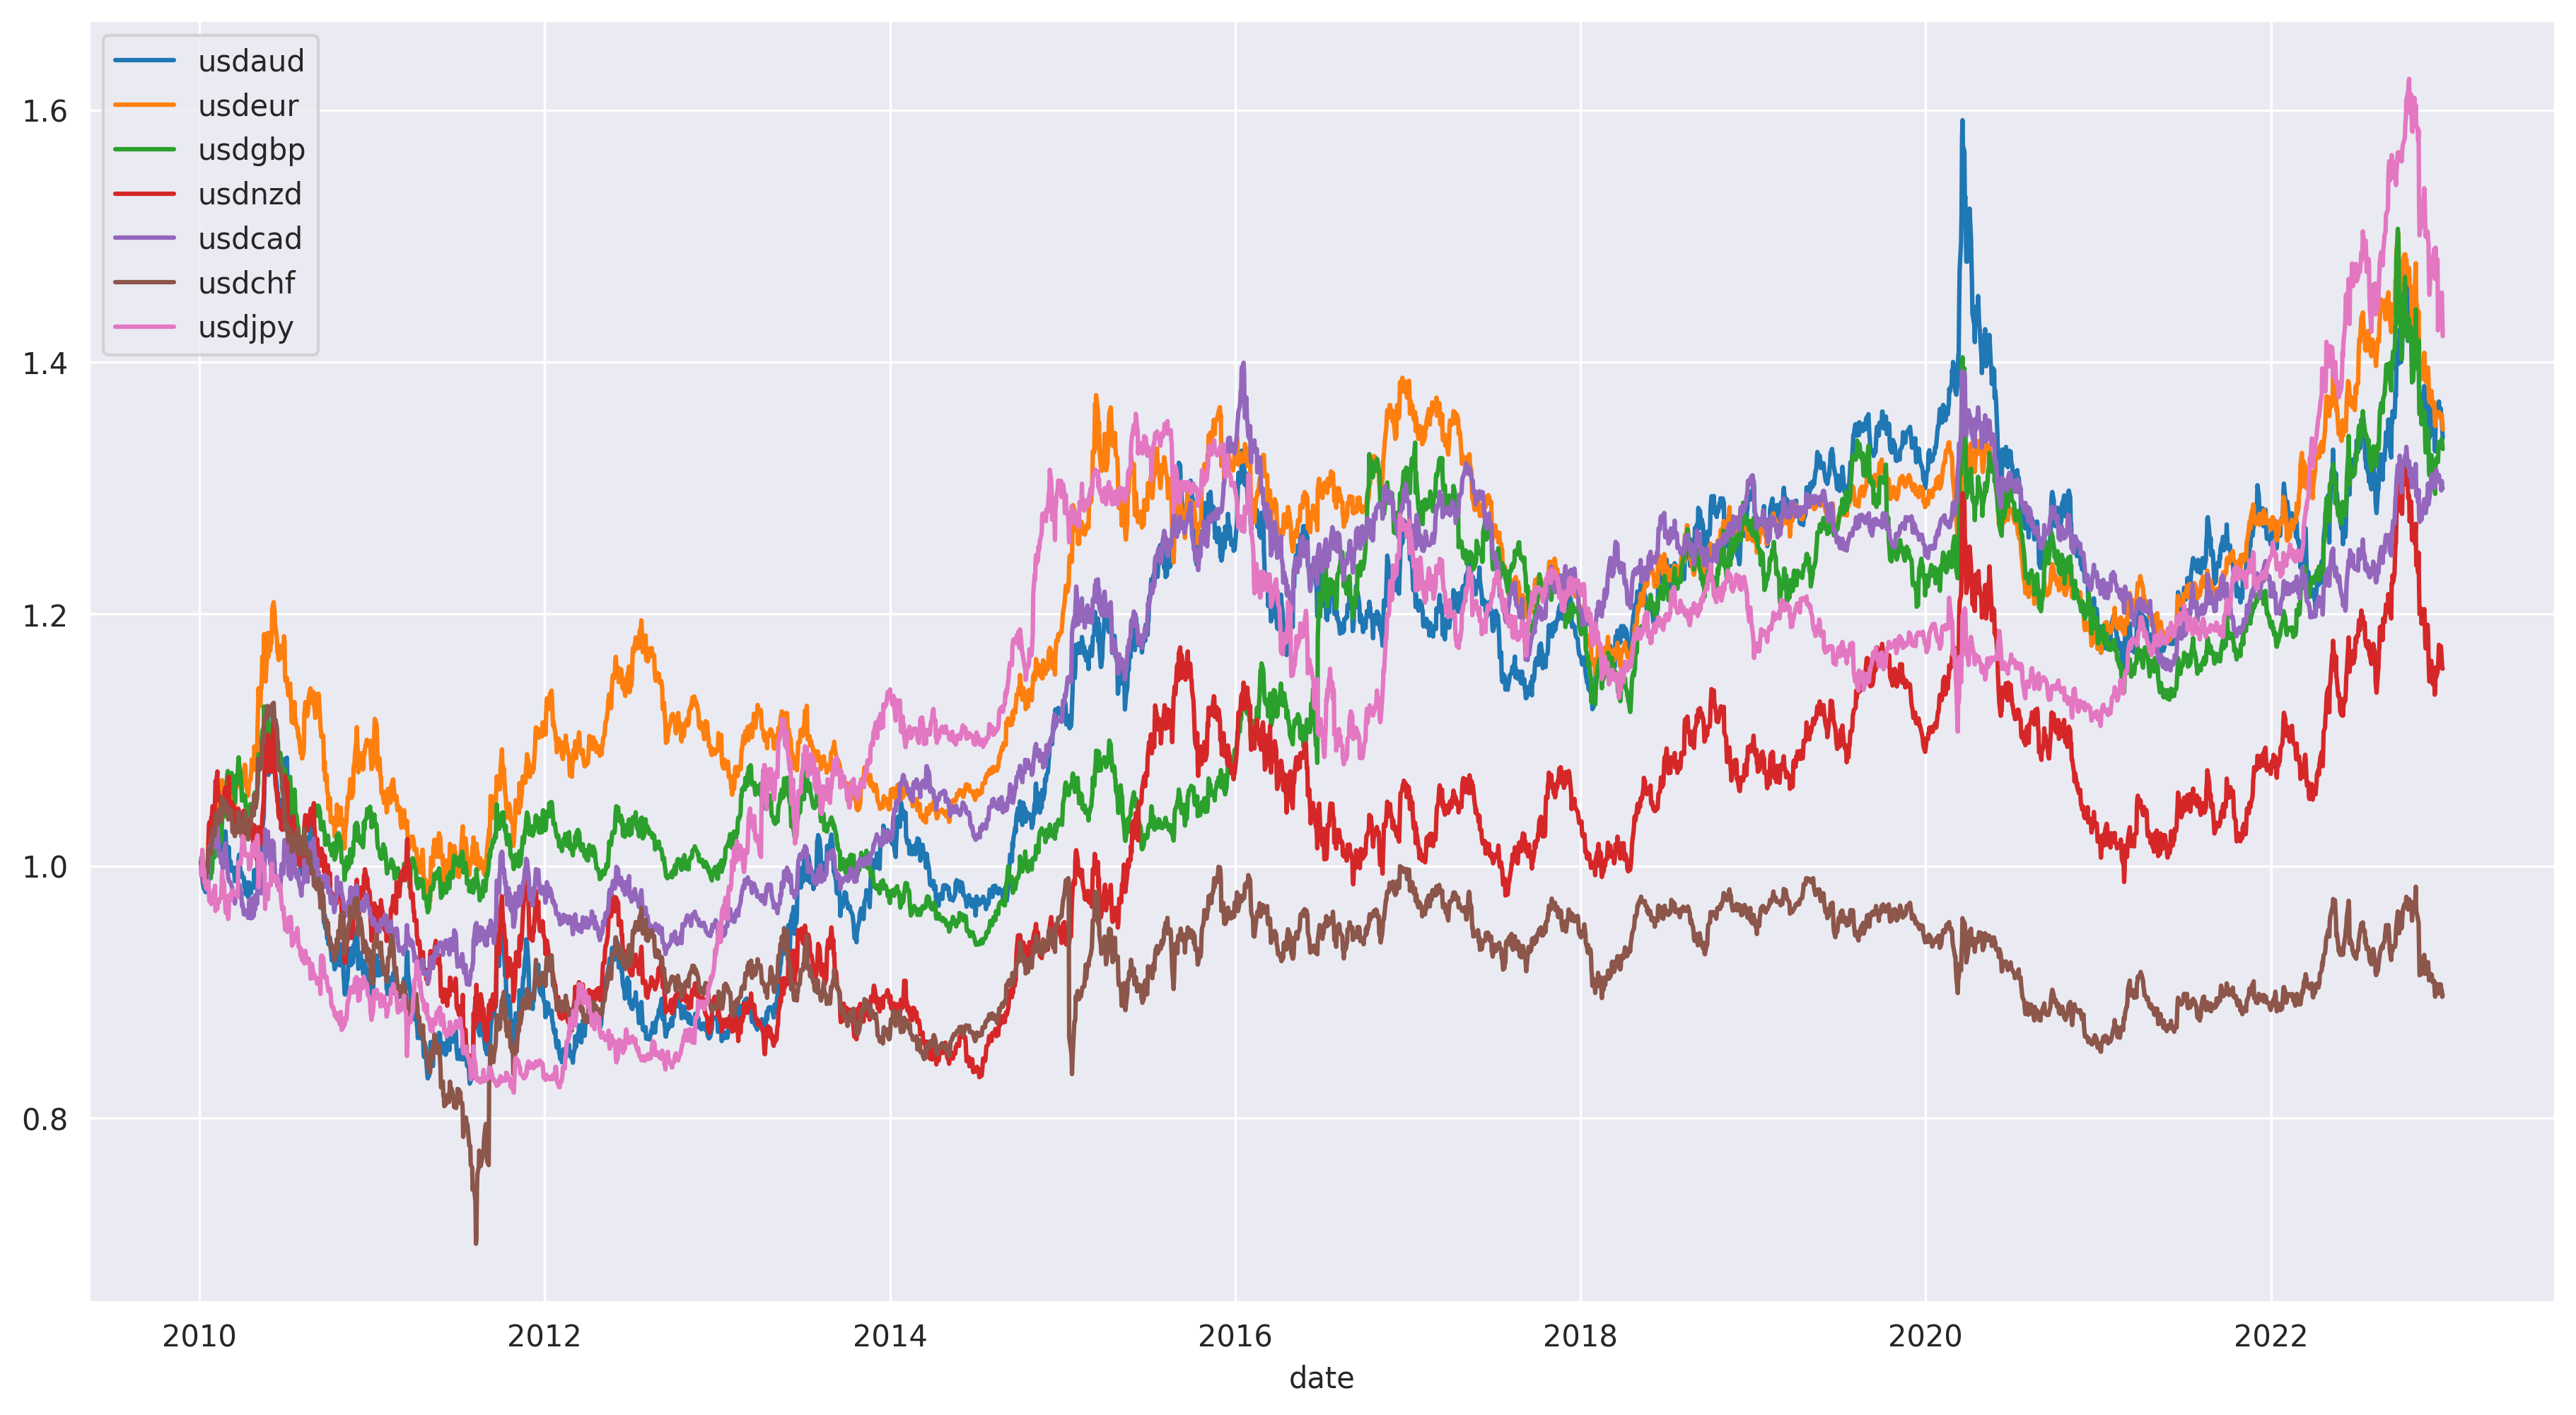

In [7]:
plt.figure(figsize=(15,8), dpi=300)

sns.lineplot(
    data=df_majors_normalized,
    dashes=False,
);